# Proyecto: Predicción de edad de abulones (Abalone dataset)
**Objetivo:** Realizar un EDA completo (11 pasos) y construir un modelo predictivo para la edad (`Age = Rings + 1.5`) usando el Abalone Dataset.

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

## Paso 2 — Importar datos
Cargamos el dataset directamente desde la URL: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data  
Asignamos nombres de columnas y creamos una copia de trabajo (para preservar el dataset original).  
Además crearemos la variable `Age = Rings + 1.5`.


In [175]:
# Cargar el dataset (ajustar la URL según su grupo)

nombres_columnas = ['Sex', 'longitud', 'Diametro', 'altura', 'peso_total', 'peso_cuerpo', 'peso_viseras', 'peso_concha', 'anillos']
datos = pd.read_csv(' https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data ',
                    names= nombres_columnas,
                    header=None)
# Crear una copia de trabajo

datos_trabajo = datos.copy()
# Visualizar las primeras filas
print(datos_trabajo.head())
print(f"\nDimensiones del dataset: {datos_trabajo.shape}")

  Sex  longitud  Diametro  altura  peso_total  peso_cuerpo  peso_viseras  \
0   M     0.455     0.365   0.095      0.5140       0.2245        0.1010   
1   M     0.350     0.265   0.090      0.2255       0.0995        0.0485   
2   F     0.530     0.420   0.135      0.6770       0.2565        0.1415   
3   M     0.440     0.365   0.125      0.5160       0.2155        0.1140   
4   I     0.330     0.255   0.080      0.2050       0.0895        0.0395   

   peso_concha  anillos  
0        0.150       15  
1        0.070        7  
2        0.210        9  
3        0.155       10  
4        0.055        7  

Dimensiones del dataset: (4177, 9)


In [176]:
import os

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
col_names = ['Sex', 'longitud', 'Diametro', 'altura', 'peso_total', 'peso_cuerpo', 'peso_viseras', 'peso_concha', 'anillos']

df = pd.read_csv(url, header=None, names=col_names)
df_original = df.copy()  # preservamos original

# Crear variable Age = Rings + 1.5 (justificación: edad aproximada en años; Rings ~ número de anillos, +1.5 para ajustar estimación media)
df['Age'] = df['anillos'] + 1.5

print("Datos cargados \u2014 shape:", df.shape)
df.head(10)

Datos cargados — shape: (4177, 10)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,20.5


## Paso 3 — Revisar datos NAN
Verificaremos tipos, estadísticos, valores faltantes y construiremos un pequeño reporte con columnas, tipos, n_missing, n_unique y %missing.


=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           4177 non-null   object 
 1   longitud      4177 non-null   float64
 2   Diametro      4177 non-null   float64
 3   altura        4177 non-null   float64
 4   peso_total    4177 non-null   float64
 5   peso_cuerpo   4177 non-null   float64
 6   peso_viseras  4177 non-null   float64
 7   peso_concha   4177 non-null   float64
 8   anillos       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB

=== ESTADÍSTICOS DESCRIPTIVOS ===
          longitud     Diametro       altura   peso_total  peso_cuerpo  \
count  4177.000000  4177.000000  4177.000000  4177.000000  4177.000000   
mean      0.523992     0.407881     0.139516     0.828742     0.359367   
std       0.120093     0.099240     0.041827     0.490389     0.2219

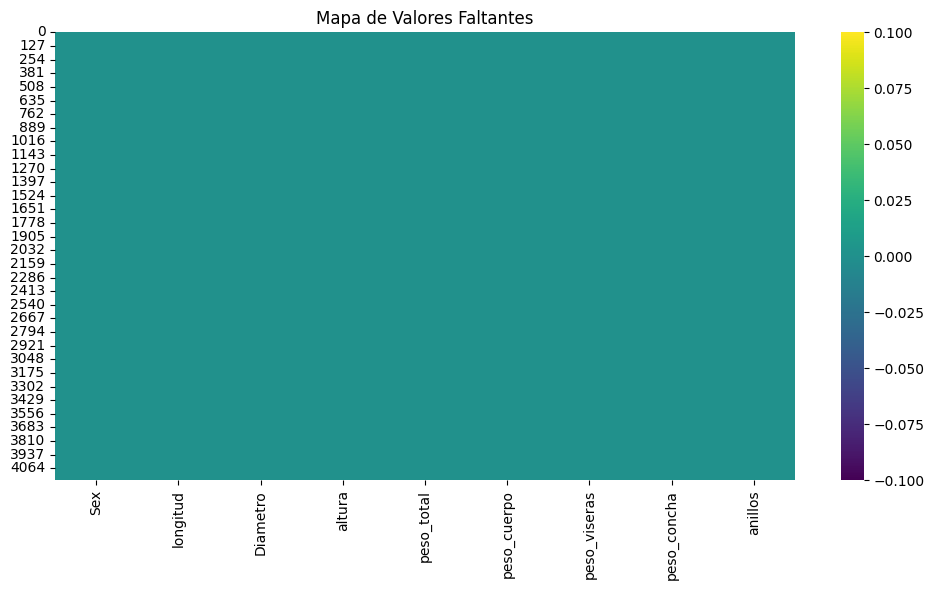

In [177]:
# Información general del dataset
print("=== INFORMACIÓN DEL DATASET ===")
datos_trabajo.info()
# Estadísticos descriptivos
print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(datos_trabajo.describe())
# Conteo de valores faltantes
print("\n=== VALORES FALTANTES ===")
print(datos_trabajo.isna().sum())
# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(datos_trabajo.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()

## Paso 4 — Limpiar datos
Tareas:
- Normalizar `Sex` (strip, upper)
- Detectar y eliminar duplicados
- Tratar valores faltantes (si existen)
- Detectar outliers mediante IQR y mostrar ejemplos
- Aplicar transformaciones justificadas (p.ej. log en pesos si hay asimetría)


In [178]:
df['Sex'] = df['Sex'].astype(str).str.strip().str.upper()
print("Valores únicos en Sex:", df['Sex'].unique())

# Duplicados
n_dup = df.duplicated().sum()
print(f"Duplicados encontrados: {n_dup}")
if n_dup > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados. Nuevo shape:", df.shape)

# No vemos valores NaN (revisar)
print("Missing tras limpieza:", df.isna().sum().sum())

# Detectar outliers por IQR para variables numéricas
# Excluir 'Sex' de num_cols porque es categórica
num_cols = ['longitud', 'Diametro', 'altura', 'peso_total', 'peso_cuerpo', 'peso_viseras', 'peso_concha']
outlier_summary = []
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < low) | (df[col] > high)]
    outlier_summary.append((col, len(outliers), low, high))
    print(f"{col}: outliers={len(outliers)} (limits: {low:.4f}, {high:.4f})")
    if len(outliers)>0:
        display(outliers.sample(min(3, len(outliers))))

# Aplicar transformación log1p a pesos si la distribución está muy sesgada
for col in ["peso_total","peso_cuerpo","peso_viseras","peso_concha"]:
    print(f"{col} skew before: {df[col].skew():.3f}")
    df[f'{col}_log1p'] = np.log1p(df[col])
    print(f"{col} skew after (log1p): {df[f'{col}_log1p'].skew():.3f}")

Valores únicos en Sex: ['M' 'F' 'I']
Duplicados encontrados: 0
Missing tras limpieza: 0
longitud: outliers=49 (limits: 0.2025, 0.8625)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
2371,M,0.180,0.125,0.05,0.0230,0.0085,0.0055,0.010,3,4.5
1056,I,0.200,0.155,0.04,0.0435,0.0155,0.0090,0.007,4,5.5
3318,M,0.165,0.125,0.04,0.0245,0.0095,0.0045,0.008,4,5.5


Diametro: outliers=59 (limits: 0.1550, 0.6750)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
720,I,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.005,3,4.5
3600,I,0.175,0.125,0.040,0.0280,0.0095,0.0080,0.009,4,5.5
3899,I,0.140,0.105,0.035,0.0145,0.0050,0.0035,0.005,4,5.5


altura: outliers=29 (limits: 0.0400, 0.2400)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
1987,I,0.160,0.110,0.025,0.0195,0.0075,0.0050,0.006,4,5.5
1417,M,0.705,0.565,0.515,2.2100,1.1075,0.4865,0.512,10,11.5
2179,F,0.595,0.470,0.250,1.2830,0.4620,0.2475,0.445,14,15.5


peso_total: outliers=30 (limits: -0.6258, 2.2203)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
3008,F,0.750,0.615,0.205,2.2635,0.8210,0.423,0.726,12,13.5
1426,F,0.745,0.570,0.215,2.2500,1.1565,0.446,0.558,9,10.5
891,M,0.730,0.595,0.230,2.8255,1.1465,0.419,0.897,17,18.5


peso_cuerpo: outliers=48 (limits: -0.2880, 0.9760)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
1761,M,0.750,0.595,0.205,2.2205,1.0830,0.4210,0.6300,12,13.5
2710,M,0.750,0.555,0.215,2.2010,1.0615,0.5235,0.5285,11,12.5
2862,M,0.735,0.570,0.210,2.2355,1.1705,0.4630,0.5315,10,11.5


peso_viseras: outliers=26 (limits: -0.1458, 0.4923)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
2810,M,0.72,0.55,0.205,2.1650,1.1055,0.5250,0.4040,10,11.5
1762,M,0.77,0.62,0.195,2.5155,1.1155,0.6415,0.6420,12,13.5
1757,F,0.73,0.56,0.190,1.9425,0.7990,0.5195,0.5655,11,12.5


peso_concha: outliers=35 (limits: -0.1685, 0.6275)


,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,anillos,Age
164,F,0.650,0.545,0.230,1.752,0.5605,0.2895,0.815,16,17.5
81,M,0.620,0.510,0.175,1.615,0.5105,0.1920,0.675,12,13.5
3151,F,0.665,0.500,0.175,1.742,0.5950,0.3025,0.725,21,22.5


peso_total skew before: 0.531
peso_total skew after (log1p): -0.038
peso_cuerpo skew before: 0.719
peso_cuerpo skew after (log1p): 0.306
peso_viseras skew before: 0.592
peso_viseras skew after (log1p): 0.376
peso_concha skew before: 0.621
peso_concha skew after (log1p): 0.315


## Paso 5 — Visualizaciones
Generaremos las visualizaciones solicitadas para cada variable: countplot para Sex, hist + kde, boxplots, scatter plots relevantes y relaciones target vs features. Después de cada figura, se debe añadir una breve interpretación.


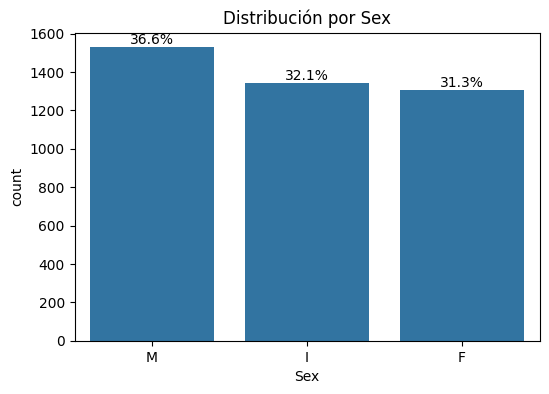

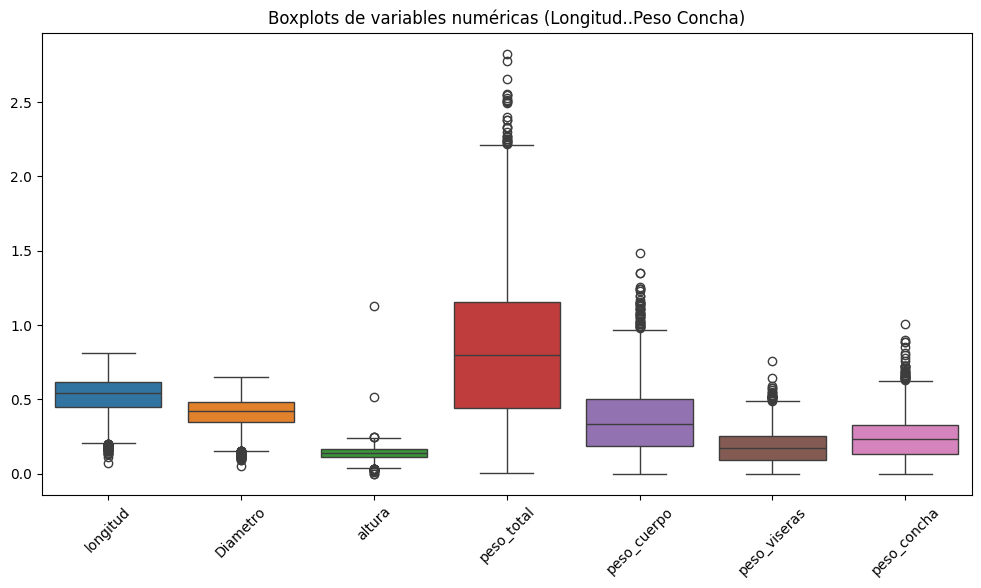

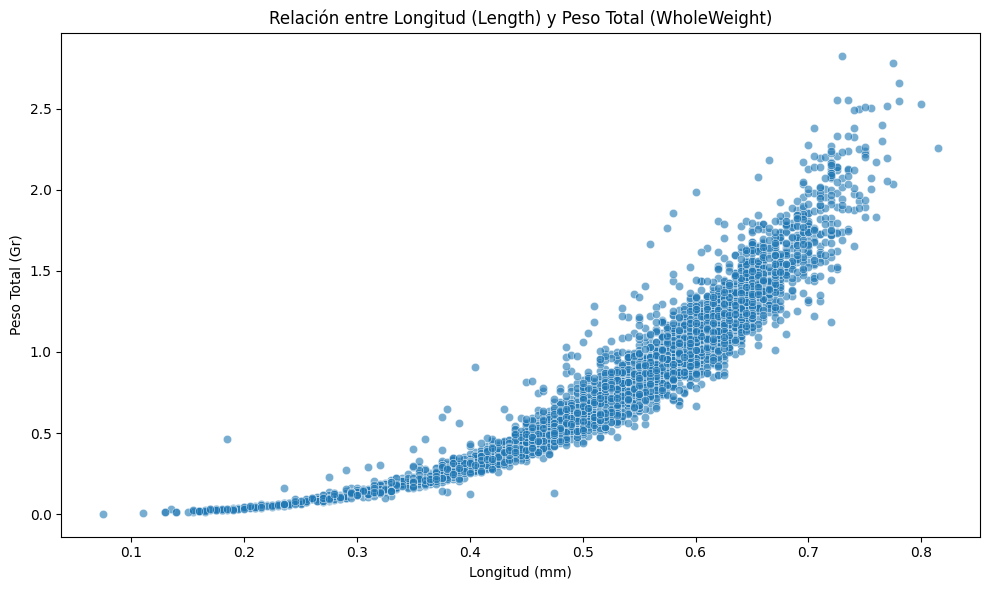

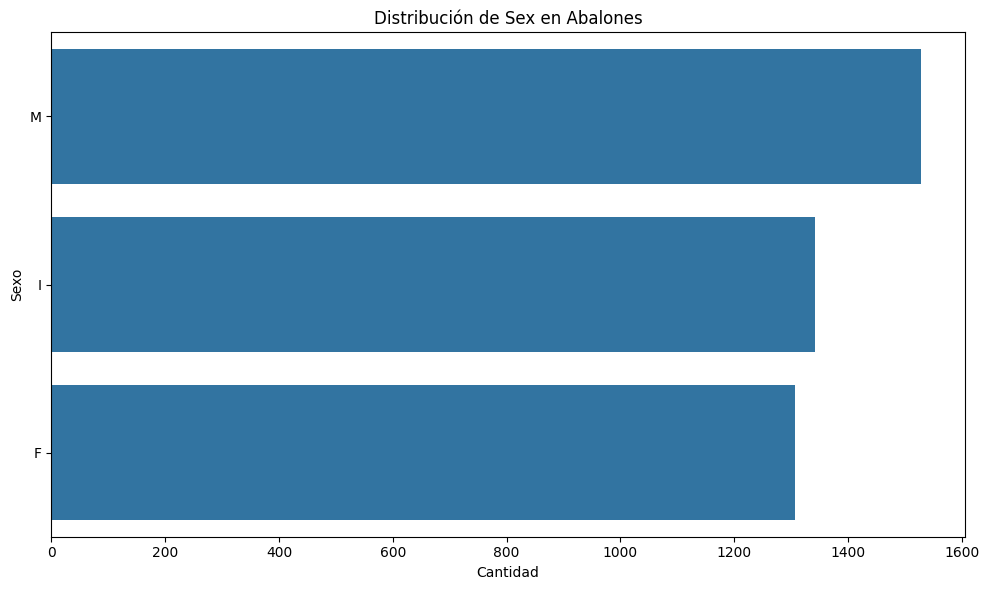

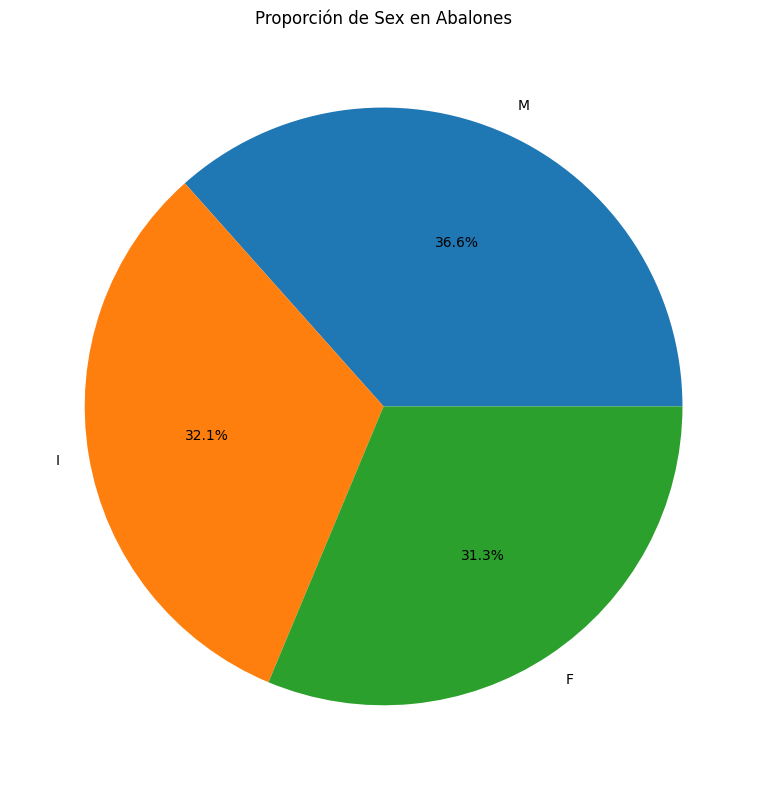

In [179]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Sex', order=df['Sex'].value_counts().index)
total = len(df)
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='bottom')
plt.title('Distribución por Sex')
plt.show()


# Boxplots para detectar outliers
# num_cols ya está definido con nombres en español en la celda anterior
num_cols = ['longitud', 'Diametro', 'altura', 'peso_total', 'peso_cuerpo', 'peso_viseras', 'peso_concha']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots de variables numéricas (Longitud..Peso Concha)')
plt.xticks(rotation=45)
plt.show()

# Gráfica 4: Relación entre Longitud y Peso Total
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitud', y='peso_total', alpha=0.6)
plt.title('Relación entre Longitud (Length) y Peso Total (WholeWeight)')
plt.xlabel('Longitud (mm)')
plt.ylabel('Peso Total (Gr)')
plt.tight_layout()
plt.show()


# Gráfica 2: Distribución de Sex
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Sex', order=df['Sex'].value_counts().index)
plt.title('Distribución de Sex en Abalones')
plt.xlabel('Cantidad')
plt.ylabel('Sexo')
plt.tight_layout()
plt.show()


# Gráfica 5: Proporción de Sex
plt.figure(figsize=(8, 8))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Sex en Abalones')
plt.ylabel('')
plt.tight_layout()
plt.show()



,variable,stat,p_value,conclusion
0,longitud,0.9697,0.0,No normal
1,Diametro,0.9705,0.0,No normal
2,altura,0.8896,0.0,No normal
3,peso_total,0.9723,0.0,No normal
4,peso_cuerpo,0.9621,0.0,No normal
5,peso_viseras,0.9681,0.0,No normal
6,peso_concha,0.9704,0.0,No normal
7,anillos,0.9312,0.0,No normal
8,Age,0.9312,0.0,No normal


<Figure size 600x400 with 0 Axes>

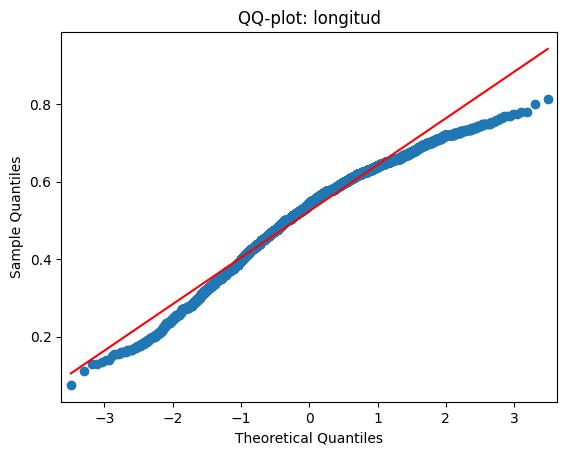

<Figure size 600x400 with 0 Axes>

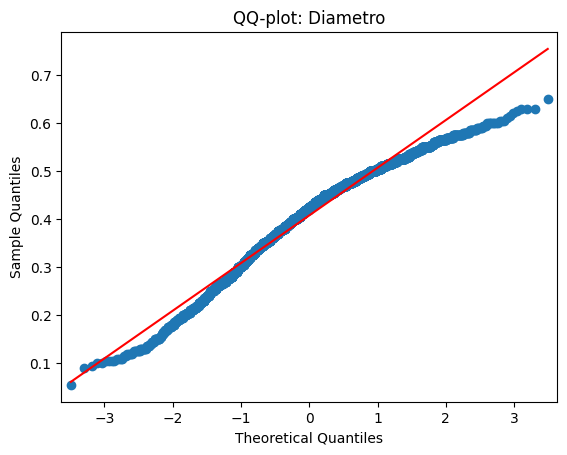

<Figure size 600x400 with 0 Axes>

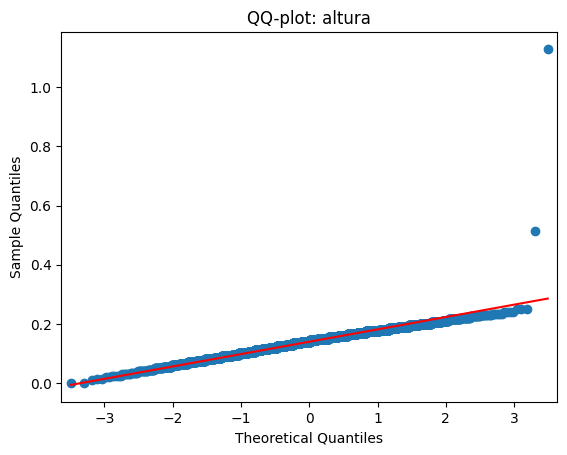

<Figure size 600x400 with 0 Axes>

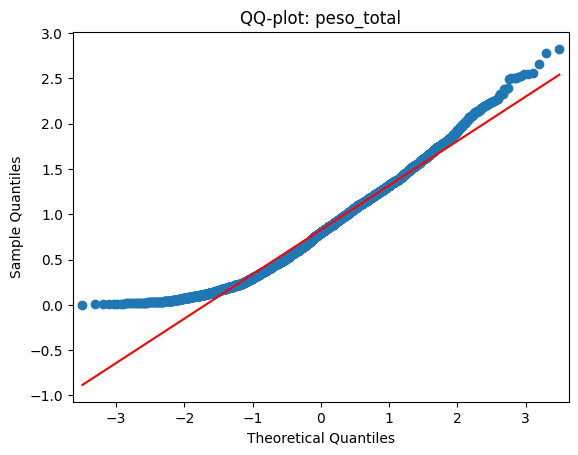

In [180]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Asegurar df y las columnas numéricas
assert 'df' in globals(), "No se encontró df en el entorno. Ejecuta las celdas previas de carga/EDA."

numeric_for_test = ["longitud","Diametro","altura","peso_total","peso_cuerpo","peso_viseras","peso_concha","anillos","Age"]
alpha = 0.05
results = []

for col in numeric_for_test:
    data = df[col].dropna()
    if len(data) == 0:
        results.append((col, None, None, "sin datos"))
        continue
    if len(data) <= 5000:
        stat, p = shapiro(data)
        conclusion = 'Normal' if p > alpha else 'No normal'
        results.append((col, round(stat,4), round(p,6), conclusion))
    else:
        # fallback: KS test against normal with same mean/std (no es perfecto pero informativo)
        stat, p = kstest((data - data.mean()) / data.std(), 'norm')
        conclusion = 'Normal (KS)' if p > alpha else 'No normal (KS)'
        results.append((col, round(stat,4), round(p,6), conclusion))

res_df = pd.DataFrame(results, columns=['variable','stat','p_value','conclusion'])
display(res_df)

# QQ-plots para las 4 variables con p-value más pequeño (más desviadas)
bad_vars = res_df[res_df['conclusion'].str.contains('No')]['variable'].tolist()[:4]
import statsmodels.api as sm
for col in bad_vars:
    plt.figure(figsize=(6,4))
    sm.qqplot(df[col].dropna(), line='s')
    plt.title(f'QQ-plot: {col}')
    plt.show()

**Interpretaciones rápidas (ejemplo)**  
- `Sex`: distribución por M, F, I; indicar si hay balance o no.  
- `Length` y `WholeWeight`: parece existir correlación positiva.  
- `Rings`/`Age`: revisar sesgo; si es muy sesgada, considerar transformaciones o robustez en métricas.  
(Escribir tu análisis después de observar las gráficas en el notebook.)


## Paso 6 — Conversión de variables a número
Se codificará `Sex` usando OneHotEncoder (prefiero One-Hot para que no haya orden implícito).
Todas las transformaciones se incluirán en un `ColumnTransformer` para garantizar reproducibilidad.


In [181]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
categorical_features = ['Sex']
numeric_features = ["longitud","Diametro","altura","peso_total","peso_cuerpo","peso_viseras","peso_concha"]
# We also created log versions for weights; decide si usarlas (toggle)
numeric_with_logs = numeric_features + [f'{c}_log1p' for c in ["peso_total","peso_cuerpo","peso_viseras","peso_concha"]
                                        if f'{c}_log1p' in df.columns] # Ensure log columns exist

# Transformer ejemplo: OneHotEncoder para Sex, StandardScaler para num (puedes cambiar a MinMaxScaler)
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler_std = StandardScaler()
column_transformer = ColumnTransformer([
    ('onehot', onehot, categorical_features),
    ('scaler', scaler_std, numeric_with_logs),
], remainder='drop', verbose_feature_names_out=False)

# Mostrar ejemplo de transformación (sin encajar completamente)
sample_X = df[categorical_features + numeric_with_logs].head()
display(sample_X)

,Sex,longitud,Diametro,altura,peso_total,peso_cuerpo,peso_viseras,peso_concha,peso_total_log1p,peso_cuerpo_log1p,peso_viseras_log1p,peso_concha_log1p
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.414755,0.202533,0.096219,0.139762
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.203349,0.094856,0.047361,0.067659
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.517006,0.228330,0.132343,0.190620
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.416075,0.195156,0.107957,0.144100
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.186480,0.085719,0.038740,0.053541


## Paso 7 — Normalización
Compararemos `StandardScaler` vs `MinMaxScaler` y dejaremos la elección documentada. Importante: **no** escalamos la variable objetivo `Age`.



StandardScaler — mean: 0.0000, std: 1.0000, min: -1.7904, max: 2.7952


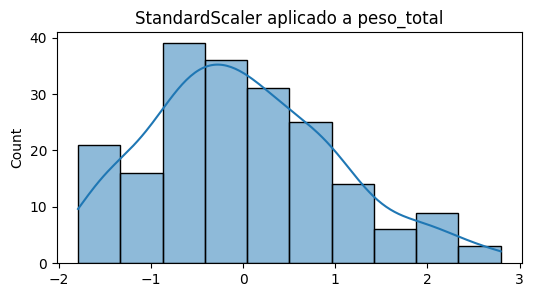


MinMaxScaler — mean: 0.3904, std: 0.2181, min: 0.0000, max: 1.0000


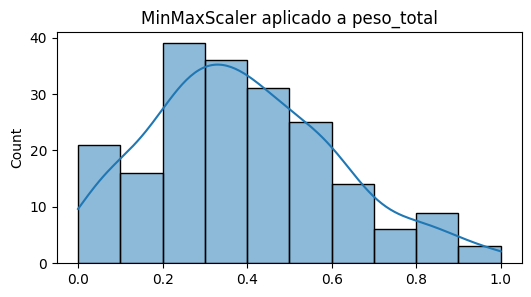

In [182]:
from sklearn.preprocessing import MinMaxScaler

RANDOM_STATE = 42 # Definir RANDOM_STATE para reproducibilidad
scalers = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler()}
col_to_check = ['peso_total']
df_sample = df[col_to_check].dropna().sample(200, random_state=RANDOM_STATE)
for name, s in scalers.items():
    transformed = s.fit_transform(df_sample)
    print(f"\n{name} — mean: {transformed.mean():.4f}, std: {transformed.std():.4f}, min: {transformed.min():.4f}, max: {transformed.max():.4f}")
    plt.figure(figsize=(6,3))
    sns.histplot(transformed.flatten(), kde=True)
    plt.title(f'{name} aplicado a {col_to_check[0]}')
    plt.show()

## Paso 8 — Correlación
Calcularemos matriz de correlación Pearson y Spearman y visualizaremos heatmaps. Identificaremos variables con mayor correlación con `Age`.


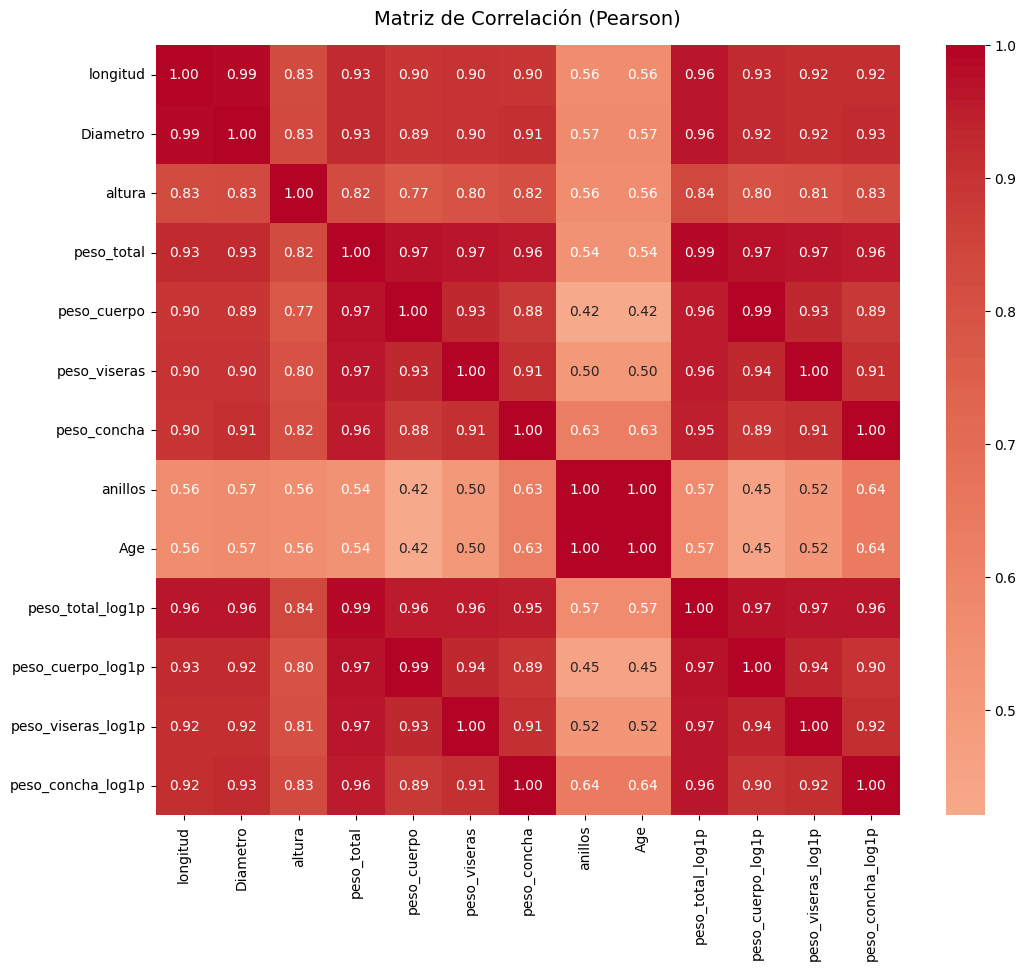

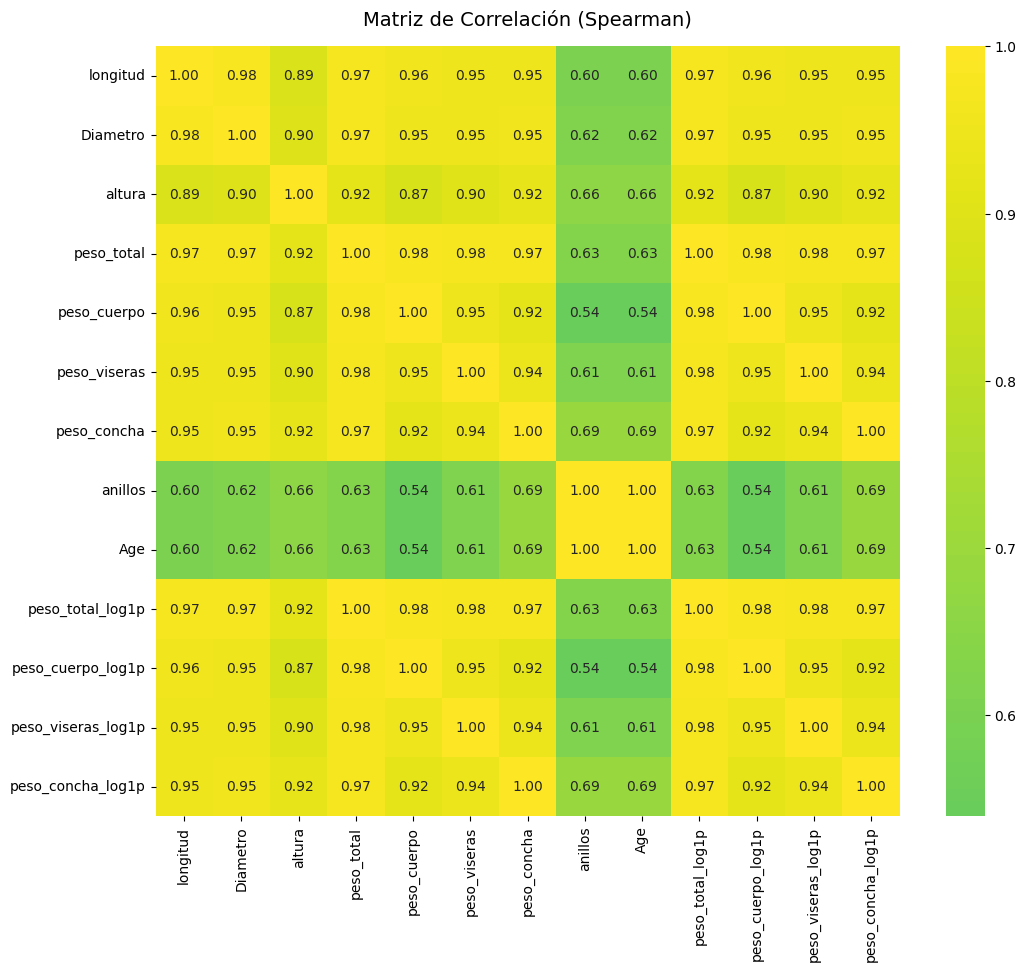

,Age
Age,1.000000
anillos,1.000000
peso_concha_log1p,0.635717
peso_concha,0.627574
Diametro,0.574660
peso_total_log1p,0.568168
altura,0.557467
longitud,0.556720
peso_total,0.540390
peso_viseras_log1p,0.516792



Variables con correlación positiva fuerte (> 0.5):
Age                   1.000000
anillos               1.000000
peso_concha_log1p     0.635717
peso_concha           0.627574
Diametro              0.574660
peso_total_log1p      0.568168
altura                0.557467
longitud              0.556720
peso_total            0.540390
peso_viseras_log1p    0.516792
peso_viseras          0.503819
Name: Age, dtype: float64

Variables con correlación negativa fuerte (< -0.3):
Series([], Name: Age, dtype: float64)

Interpretación automática:
Las variables con mayor correlación positiva con la edad son Age, anillos, peso_concha_log1p. No se observaron correlaciones negativas significativas.


In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Asegurar consistencia de los datos ---
df['Sex'] = df['Sex'].astype(str).str.strip().str.upper()

# Crear un dataframe auxiliar con codificación one-hot (sin modificar el original)
df_corr = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=False)

# Seleccionar solo columnas numéricas
num_df = df_corr.select_dtypes(include=[np.number])

# --- Calcular correlaciones ---
corr_pearson = num_df.corr(method='pearson')
corr_spearman = num_df.corr(method='spearman')

# --- Heatmap Pearson ---
plt.figure(figsize=(12,10))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (Pearson)', fontsize=14, pad=15)
plt.show()

# --- Heatmap Spearman ---
plt.figure(figsize=(12,10))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap='viridis', center=0)
plt.title('Matriz de Correlación (Spearman)', fontsize=14, pad=15)
plt.show()

# --- Correlación con Age ---
corr_with_age = corr_pearson['Age'].sort_values(ascending=False)
display(corr_with_age)

# --- Identificar correlaciones fuertes ---
threshold_pos = 0.5
threshold_neg = -0.3
strong_pos = corr_with_age[corr_with_age > threshold_pos]
strong_neg = corr_with_age[corr_with_age < threshold_neg]

print("\nVariables con correlación positiva fuerte (> 0.5):")
print(strong_pos)

print("\nVariables con correlación negativa fuerte (< -0.3):")
print(strong_neg)

# --- Interpretación automática ---
def interpretar_correlacion(corr_series):
    """Genera interpretación textual a partir de la correlación con Age."""
    top_vars = corr_series.head(3).index.tolist()
    msg = f"Las variables con mayor correlación positiva con la edad son {', '.join(top_vars[:3])}. "
    if len(strong_neg) > 0:
        neg_vars = ', '.join(strong_neg.index.tolist())
        msg += f"Se observaron correlaciones negativas destacadas con {neg_vars}, "
        msg += "lo que sugiere una relación inversa con la edad."
    else:
        msg += "No se observaron correlaciones negativas significativas."
    return msg

print("\nInterpretación automática:")
print(interpretar_correlacion(corr_with_age))

## Paso 9 — Test de Normalidad

Objetivo: evaluar si las variables numéricas clave (Length, Diameter, Height, pesos, Rings, Age) siguen una distribución normal.
Procedimiento:
- Aplicar Shapiro-Wilk (válido para n ≤ 5000). Si n > 5000, se usa KS o sólo chequeos visuales (QQ-plot + hist).
- Reportar p-values y conclusiones (ALPHA = 0.05).
- Mostrar Q-Q plots para las variables con mayor desviación.

In [184]:
from scipy.stats import shapiro
import pandas as pd

# Función para test de normalidad Shapiro-Wilk
def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK PARA NORMALIDAD ===")
    print(f"Nivel de significancia (α): {alpha}\n")

    resultados = []

    for col in dataframe.columns:
        # Solo aplicar a variables numéricas
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            data = dataframe[col].dropna()

            # Shapiro requiere al menos 3 datos
            if len(data) >= 3:
                stat, p_value = shapiro(data)
                conclusion = "NORMAL" if p_value > alpha else "NO NORMAL"

                resultados.append([col, stat, p_value, conclusion])

    # Crear tabla bonita
    tabla_resultados = pd.DataFrame(resultados,
        columns=["Variable", "W (estadístico)", "p-valor", "Conclusión"])

    return tabla_resultados

# Ejecutar el test en el dataset de trabajo
tabla_normalidad = test_normalidad(df)   # Cambia df si tu dataset se llama diferente
tabla_normalidad

=== TEST DE SHAPIRO-WILK PARA NORMALIDAD ===
Nivel de significancia (α): 0.05



,Variable,W (estadístico),p-valor,Conclusión
0,longitud,0.969658,7.442089e-29,NO NORMAL
1,Diametro,0.970477,1.648334e-28,NO NORMAL
2,altura,0.889615,1.181267e-47,NO NORMAL
3,peso_total,0.972285,1.013778e-27,NO NORMAL
4,peso_cuerpo,0.962064,9.340985e-32,NO NORMAL
5,peso_viseras,0.968139,1.777103e-29,NO NORMAL
6,peso_concha,0.970424,1.565014e-28,NO NORMAL
7,anillos,0.931154,3.259150e-40,NO NORMAL
8,Age,0.931154,3.259150e-40,NO NORMAL
9,peso_total_log1p,0.987109,4.322096e-19,NO NORMAL


**Interpretación del test de normalidad (Shapiro-Wilk)**

El test de Shapiro-Wilk mostró p < 0.05 para las variables analizadas: **no siguen distribución normal**.
Esto es esperado en datos biológicos (los pesos y medidas suelen estar sesgados).

**Decisión y justificación:** Continuamos con el modelado porque los algoritmos usados (Ridge, RandomForest,
GradientBoosting, XGBoost) no requieren normalidad de las variables. Además:
- Aplicamos `log1p` a variables de peso cuando fue apropiado.
- Estandarizamos características dentro de `ColumnTransformer`.
Por tanto, la no-normalidad queda documentada y mitigada para fines predictivos.


## Paso 10 — Pregunta de investigación
Propuestas:
1. ¿Qué tan bien se puede predecir la edad (`Age`) de un abulón a partir de sus medidas físicas y sexo? (Pregunta principal)



## Paso 11 — Prediccion


=== EVALUACIÓN DEL MODELO ===
MSE (Error Cuadrático Medio): 5.1329
RMSE (Raíz del MSE): 2.2656
R² (Coeficiente de Determinación): 0.5258

Interpretación: El modelo explica aproximadamente el 52.58% de la variabilidad en la edad (Age).

=== IMPORTANCIA DE VARIABLES (Regresión Lineal) ===


,Variable,Coeficiente
11,peso_cuerpo_log1p,-17.626775
10,peso_total_log1p,17.201692
7,peso_cuerpo,11.399154
6,peso_total,-8.982528
12,peso_viseras_log1p,-5.159593
8,peso_viseras,3.821956
9,peso_concha,2.626459
13,peso_concha_log1p,-1.432185
3,longitud,-0.872243
4,Diametro,0.488276


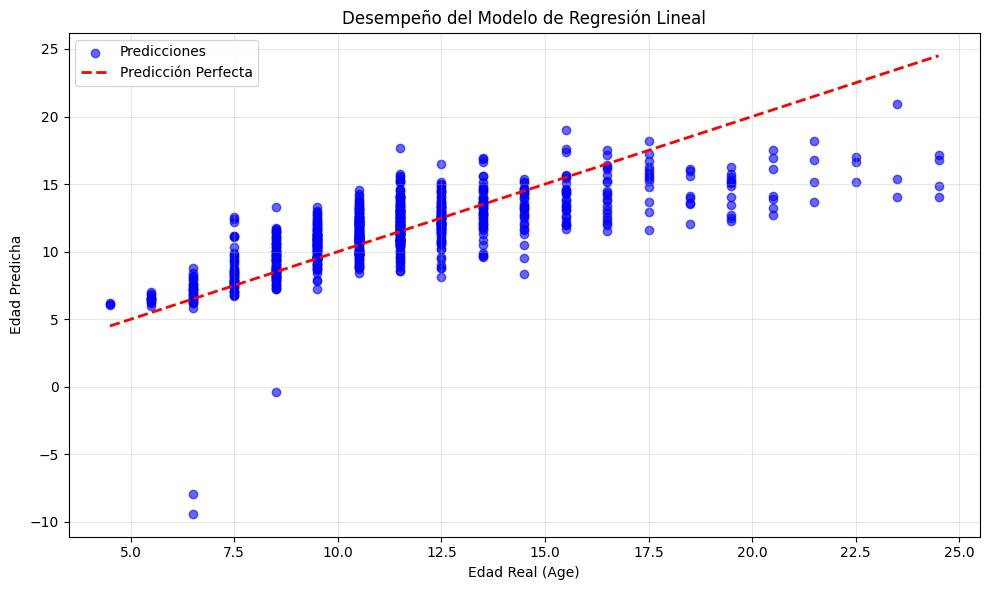

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ================================
# 1. Definir variable objetivo
# ================================
# Corregir data leakage: Eliminar 'anillos' de las características, ya que 'Age' se deriva directamente de ella.
X = df.drop(['Age', 'anillos'], axis=1)
y = df['Age']

# ================================
# 2. Separar datos en train/test
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# 3. Procesamiento:
#    - OneHot para 'Sex'
#    - StandardScaler para numéricas
# ================================
columnas_categoricas = ['Sex']
# Construir columnas_numericas excluyendo las categóricas
columnas_numericas = [col for col in X_train.columns if col not in columnas_categoricas]

preprocesamiento = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas),
    ('scaler', StandardScaler(), columnas_numericas)
])

# ================================
# 4. Crear Pipeline + Entrenar
# ================================
modelo_lineal = Pipeline(steps=[
    ('preprocesamiento', preprocesamiento),
    ('modelo', LinearRegression())
])

modelo_lineal.fit(X_train, y_train)

# ================================
# 5. Realizar predicciones
# ================================
y_pred = modelo_lineal.predict(X_test)

# ================================
# 6. Evaluación del modelo
# ================================
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== EVALUACIÓN DEL MODELO ===")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del MSE): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")
print(f"\nInterpretación: El modelo explica aproximadamente el {r2*100:.2f}% "
      f"de la variabilidad en la edad (Age).")

# ================================
# 7. Importancia de Variables
# ================================
# Obtener nombres de todas las features transformadas
nombres_ohe = modelo_lineal.named_steps['preprocesamiento']\
    .named_transformers_['onehot']\
    .get_feature_names_out(columnas_categoricas)

nombres_finales = list(nombres_ohe) + columnas_numericas

coeficientes = pd.DataFrame({
    'Variable': nombres_finales,
    'Coeficiente': modelo_lineal.named_steps['modelo'].coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\n=== IMPORTANCIA DE VARIABLES (Regresión Lineal) ===")
display(coeficientes) # Usar display para DataFrames

# ================================
# 8. Gráfico: Reales vs Predichos
# ================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Predicción Perfecta')

plt.xlabel('Edad Real (Age)')
plt.ylabel('Edad Predicha')
plt.title('Desempeño del Modelo de Regresión Lineal')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()